In [2]:
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

In [3]:
inputPatterns = np.empty((4,2),dtype=int)
inputPatterns[0] = [0,0] 
inputPatterns[1] = [0,1]
inputPatterns[2] = [1,0]
inputPatterns[3] = [1,1]
inputPatterns


array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [4]:
np.random.seed(0)

In [5]:
weightsDict = {}
weightsDict['H'] = {}
weightsDict['H']['I'] = np.random.uniform(-1,1,(2,2))
weightsDict

{'H': {'I': array([[0.09762701, 0.43037873],
         [0.20552675, 0.08976637]])}}

In [6]:
weightsDict['O'] = {}
weightsDict['O']['H'] = np.random.uniform(0,2,(1,2))
weightsDict

{'H': {'I': array([[0.09762701, 0.43037873],
         [0.20552675, 0.08976637]])},
 'O': {'H': array([[0.8473096 , 1.29178823]])}}

In [7]:
def activationFunction(z):
    output = np.copy(z)
    indexes = np.where(output < 0) 
    output[indexes] = 0
    return output

In [8]:
z = np.linspace(-5,5,10)
z

array([-5.        , -3.88888889, -2.77777778, -1.66666667, -0.55555556,
        0.55555556,  1.66666667,  2.77777778,  3.88888889,  5.        ])

In [9]:
print(activationFunction(z))

[0.         0.         0.         0.         0.         0.55555556
 1.66666667 2.77777778 3.88888889 5.        ]


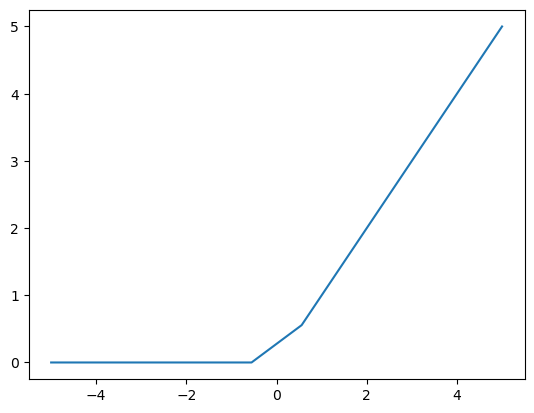

In [10]:
plt.figure()
plt.plot(z, activationFunction(z)) 

In [11]:
sample = inputPatterns[1]
sampleW = weightsDict['H']['I'][0]

activity = 0
for i in sample:
    activity = sample[i] * sampleW[i]

print(activity)

0.43037873274483895


In [12]:
sample = inputPatterns[1]
sampleW = weightsDict['H']['I']

activity = sampleW.dot(inputPatterns.T).T

print(activity)

[[0.         0.        ]
 [0.43037873 0.08976637]
 [0.09762701 0.20552675]
 [0.52800574 0.29529312]]


In [13]:
def computeState(weights, preactivity):
    state = weights.dot(preactivity.T).T
    return state

In [14]:
computeState(sampleW, inputPatterns)

array([[0.        , 0.        ],
       [0.43037873, 0.08976637],
       [0.09762701, 0.20552675],
       [0.52800574, 0.29529312]])

In [15]:
states = {}
activities = {}

sampleIndex = 1
sample = inputPatterns[sampleIndex]

activities['I'] = sample
states['H'] = computeState(weightsDict['H']['I'], activities['I'])
activities['H'] = activationFunction(states['H'])

states['O'] = computeState(weightsDict['O']['H'], activities['H'])
activities['O'] = activationFunction(states['O'])

print(f"Activities: {activities}")
print(f"States: {states}")

Activities: {'I': array([0, 1]), 'H': array([0.43037873, 0.08976637]), 'O': array([0.48062317])}
States: {'H': array([0.43037873, 0.08976637]), 'O': array([0.48062317])}


In [16]:
def forward(sampleIndex, inputs, display=False):
    sample = inputs[sampleIndex]

    activities['I'] = sample
    states['H'] = computeState(weightsDict['H']['I'], activities['I'])
    activities['H'] = activationFunction(states['H'])

    states['O'] = computeState(weightsDict['O']['H'], activities['H'])
    activities['O'] = activationFunction(states['O'])

    if (display):
        print(f"Weights: {weightsDict}")
        print(f"States: {states}")
        print(f"Activities: {activities}")

    return activities['O']


In [17]:
def evaluate(inputs, display=False):
    indices = np.array(range(len(inputs)))
    return forward(indices, inputs, display=display)

evaluate(inputPatterns, display=True)

Weights: {'H': {'I': array([[0.09762701, 0.43037873],
       [0.20552675, 0.08976637]])}, 'O': {'H': array([[0.8473096 , 1.29178823]])}}
States: {'H': array([[0.        , 0.        ],
       [0.43037873, 0.08976637],
       [0.09762701, 0.20552675],
       [0.52800574, 0.29529312]]), 'O': array([[0.        ],
       [0.48062317],
       [0.34821734],
       [0.82884051]])}
Activities: {'I': array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]]), 'H': array([[0.        , 0.        ],
       [0.43037873, 0.08976637],
       [0.09762701, 0.20552675],
       [0.52800574, 0.29529312]]), 'O': array([[0.        ],
       [0.48062317],
       [0.34821734],
       [0.82884051]])}


array([[0.        ],
       [0.48062317],
       [0.34821734],
       [0.82884051]])

In [18]:
targets = np.empty((4,1))
targets[0] = [0]
targets[1] = [1]
targets[2] = [1]
targets[3] = [0]
targets

array([[0.],
       [1.],
       [1.],
       [0.]])

In [19]:
np.random.seed(0)

weightsDictCopy = {}
weightsDictCopy['H'] = {}
weightsDictCopy['H']['I'] = np.random.uniform(-1,1,(2,2))
weightsDictCopy['O'] = {}
weightsDictCopy['O']['H'] = np.random.uniform(-1,1,(1,2))

In [20]:
lossHistory = []
sampleIndexHistory = []
outputActivityHistory = []
targetHistory = []
grads = {}
grads['H'] = np.empty((2,))
grads['O'] = np.empty((1,))

def lossFunc(target, output):
    return np.sum(0.5 * (target - output)**2)

def reLU_derivative(state):
    output = np.ones_like(state)
    indexes = np.where(output < 0) 
    output[indexes] = 0
    return output

def computeGrads(output, target):
    error = output - target #dL/dA
    activation_derivative_O = reLU_derivative(states['O']) #dA/dz
    grads['O'] = error * activation_derivative_O

    activation_derivative_H = reLU_derivative(states['H']) 
    grads['H'] = grads['O'].dot(weightsDict['O']['H']) * activation_derivative_H

def step(lr):
    deltaW_Out = -1 * lr * np.outer(grads['O'], activities['H'])
    weightsDict['O']['H'] += deltaW_Out

    deltaW_H = -1 * lr * np.outer(grads['H'], activities['I'])
    weightsDict['H']['I'] += deltaW_H 

def init():
    weightsDict = deepcopy(weightsDictCopy)
    return weightsDict

def train(num_epochs, patterns, targets, lr=0.001, trainSeed=1, display=False): 
    if (display):
        print(f"Initial Weights: {weightsDict}")

    np.random.seed(trainSeed)
    for epoch in range(num_epochs):
        indices = np.array(range(len(patterns)))
        np.random.shuffle(indices)

        for index in indices:
            # print('In:',patterns[index])
            output = forward(index, patterns)
            # print('Out:',output)
            # print('Targ:',targets[index])
            loss = lossFunc(targets[index], output)
            # print('L:',loss)
            lossHistory.append(loss)
            sampleIndexHistory.append(index)
            outputActivityHistory.append(output)
            targetHistory.append(targets[index])

            computeGrads(output, targets[index])
            # print(grads)
            
            # print(weightsDict['O'])
            step(lr)
            # print(weightsDict['O'])
    
    if (display):
        print(f"Final Weights: {weightsDict}")

    # print(f"Loss History: {lossHistory}")
    # print(f"Index History: {sampleIndexHistory}")
    # print(f"Output History: {outputActivityHistory}")
    # print(f"Target History: {targetHistory}")

In [21]:
weightsDict = init()
train(10000, inputPatterns, targets, lr=0.01, display=True)

Initial Weights: {'H': {'I': array([[0.09762701, 0.43037873],
       [0.20552675, 0.08976637]])}, 'O': {'H': array([[-0.1526904 ,  0.29178823]])}}
Final Weights: {'H': {'I': array([[0.10103101, 0.35661703],
       [0.51580869, 0.41088724]])}, 'O': {'H': array([[0.24451557, 0.59165645]])}}


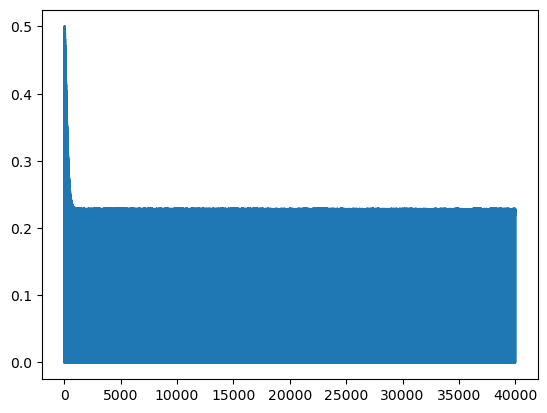

In [22]:
plt.figure()
plt.plot(lossHistory)

In [23]:
evaluate(inputPatterns, display=True)

Weights: {'H': {'I': array([[0.10103101, 0.35661703],
       [0.51580869, 0.41088724]])}, 'O': {'H': array([[0.24451557, 0.59165645]])}}
States: {'H': array([[0.        , 0.        ],
       [0.35661703, 0.41088724],
       [0.10103101, 0.51580869],
       [0.45764804, 0.92669593]]), 'O': array([[0.        ],
       [0.3303025 ],
       [0.32988519],
       [0.66018769]])}
Activities: {'I': array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]]), 'H': array([[0.        , 0.        ],
       [0.35661703, 0.41088724],
       [0.10103101, 0.51580869],
       [0.45764804, 0.92669593]]), 'O': array([[0.        ],
       [0.3303025 ],
       [0.32988519],
       [0.66018769]])}


array([[0.        ],
       [0.3303025 ],
       [0.32988519],
       [0.66018769]])

In [24]:
grads

{'H': array([-0.16452208, -0.39686023]), 'O': array([-0.67469936])}

In [25]:
outputActivityHistory

[array([0.00554165]),
 array([0.04505135]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.04718637]),
 array([0.]),
 array([0.01697953]),
 array([0.01688031]),
 array([0.04925317]),
 array([0.]),
 array([0.]),
 array([0.0514043]),
 array([0.02465581]),
 array([0.]),
 array([0.]),
 array([0.02812698]),
 array([0.05344711]),
 array([0.]),
 array([0.]),
 array([0.03372428]),
 array([0.]),
 array([0.05554463]),
 array([0.]),
 array([0.03930482]),
 array([0.]),
 array([0.]),
 array([0.05826062]),
 array([0.]),
 array([0.06046672]),
 array([0.05068112]),
 array([0.]),
 array([0.06194646]),
 array([0.05258221]),
 array([0.]),
 array([0.]),
 array([0.05591483]),
 array([0.]),
 array([0.]),
 array([0.06456286]),
 array([0.]),
 array([0.06619136]),
 array([0.]),
 array([0.06737541]),
 array([0.]),
 array([0.]),
 array([0.06895631]),
 array([0.07291588]),
 array([0.]),
 array([0.07246683]),
 array([0.00175692]),
 array([0.07091186]),
 array([0.07259378]),
 array([0.]),
 array([0.08031739]),

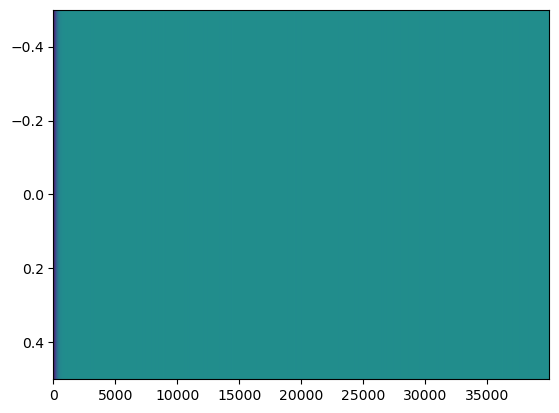

In [26]:
plt.imshow(np.array(outputActivityHistory).T, aspect="auto")